In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 
os.chdir(r"C:\Users\Admin")

In [2]:
df = pd.read_excel("train.xlsx")

In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
df.head()

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64     

In [6]:
df.isna().sum()/len(df) * 100

№ брони                0.000000
Номеров                0.000000
Стоимость              0.000000
Внесена предоплата     0.000000
Способ оплаты          0.000000
Дата бронирования      0.000000
Дата отмены           80.163521
Заезд                  0.000000
Ночей                  0.000000
Выезд                  0.000000
Источник               0.000000
Статус брони           0.000000
Категория номера       0.000000
Гостей                 0.000000
Гостиница              0.000000
dtype: float64

In [7]:
df = df.fillna(0)

In [8]:
def replace(x):
    if x != 0:
        return 1
    else:
        return 0

In [9]:
df['Дата отмены'] = df['Дата отмены'].apply(replace)

In [10]:
df

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,0,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,0,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,0,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,1,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


In [11]:
df['month'] = df['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df['weekday'] = df['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df['delta_day'] = (df['Заезд'] - df['Дата бронирования']).dt.days
df['Year'] = df['Дата бронирования'].dt.year
df['Quartal'] = df['Дата бронирования'].dt.quarter

In [92]:
import datetime
import holidays
import pandas as pd

def is_holiday_or_weekend(date):
  
  ru_holidays = holidays.RU() 

  if date in ru_holidays:
    return 1
  
  if date.weekday() in [5, 6]:
    return 1
  return 0
  
  return 0

df['Праздник/Выходной'] = df['Дата бронирования'].apply(lambda x: is_holiday_or_weekend(pd.to_datetime(x).date()))



In [13]:
df

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,Статус брони,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal,Праздник/Выходной
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,Отмена,Номер «Стандарт»,2,1,04,Thu,7,2023,2,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,Активный,Номер «Стандарт»,2,1,06,Sat,23,2022,2,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,Активный,Номер «Студия»,2,4,11,Mon,19,2022,4,0
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,Активный,Номер «Стандарт»,1,3,09,Fri,9,2023,3,0
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,2023-05-31 12:00:00,...,Активный,Номер «Люкс»,4,1,05,Sat,8,2023,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,0,2023-03-10 15:00:00,2,2023-03-12 12:00:00,...,Активный,Номер «Стандарт»,2,2,01,Sat,61,2023,1,1
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,0,2023-06-25 15:00:00,3,2023-06-28 12:00:00,...,Активный,Номер «Студия»,3,4,06,Tue,4,2023,2,0
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,0,2022-06-24 15:00:00,4,2022-06-28 12:00:00,...,Активный,Номер «Стандарт»,2,2,05,Sun,46,2022,2,0
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,1,2022-04-27 15:00:00,1,2022-04-28 12:00:00,...,Отмена,Номер «Стандарт»,2,3,02,Sat,67,2022,1,0


In [14]:
df1 = df.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [15]:
df1.head(10)

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Статус брони,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal,Праздник/Выходной
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,04,Thu,7,2023,2,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Активный,Номер «Стандарт»,2,1,06,Sat,23,2022,2,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Активный,Номер «Студия»,2,4,11,Mon,19,2022,4,0
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Активный,Номер «Стандарт»,1,3,09,Fri,9,2023,3,0
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Активный,Номер «Люкс»,4,1,05,Sat,8,2023,2,0
5,20230904-7491-218448208,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,Официальный сайт,Отмена,Номер «Стандарт»,3,3,08,Tue,20,2023,3,0
6,20220218-7492-124990127,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Отмена,Номер «Стандарт»,1,2,02,Tue,2,2022,1,0
7,20230921-7491-221547353,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,Bronevik.com(new),Активный,Номер «Стандарт»,2,3,08,Tue,22,2023,3,0
8,20230625-7491-204432766,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,Официальный сайт,Отмена,Номер «Стандарт»,2,3,06,Mon,12,2023,2,1
9,20240122-6634-234004847,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,Официальный сайт,Активный,Номер «Стандарт»,2,1,11,Wed,85,2023,4,0


In [16]:
df_month = pd.DataFrame(df1.groupby(['month','Дата отмены'])
.size()
.reset_index())

In [17]:
import seaborn as sns

<Axes: xlabel='month', ylabel='0'>

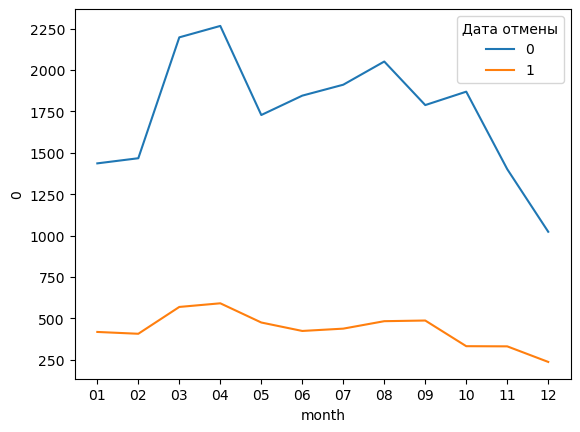

In [18]:
sns.lineplot(df_month, x ='month',y=0,hue = 'Дата отмены')

<Axes: xlabel='weekday', ylabel='0'>

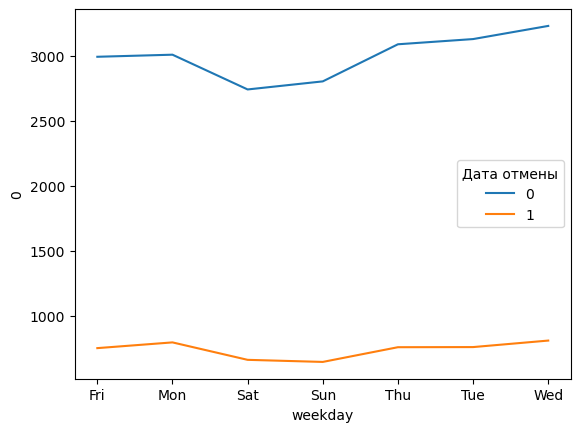

In [19]:
df_day = pd.DataFrame(df1.groupby(['weekday','Дата отмены'])
.size()
.reset_index())
sns.lineplot(df_day, x ='weekday',y=0,hue = 'Дата отмены')
#Тут приблизительно в одном разбросе 

In [20]:
inde = df1[df1['delta_day'] == -1].index
df1.loc[inde,'delta_day'] = 0

In [21]:
df1.drop(['weekday','Статус брони','№ брони'],axis = 1,inplace = True)

In [22]:
df1.head(5)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Категория номера,Гостей,Гостиница,month,delta_day,Year,Quartal,Праздник/Выходной
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2023,2,0
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Номер «Стандарт»,2,1,06,23,2022,2,0
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Номер «Студия»,2,4,11,19,2022,4,0
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Номер «Стандарт»,1,3,09,9,2023,3,0
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Номер «Люкс»,4,1,05,8,2023,2,0


In [23]:
df1.groupby(["Quartal",'Дата отмены']).size()

Quartal  Дата отмены
1        0              5100
         1              1394
2        0              5839
         1              1490
3        0              5750
         1              1408
4        0              4293
         1               900
dtype: int64

# Тут год ничего не даёт

In [24]:
df1.groupby(['Year','Дата отмены']).size()

Year  Дата отмены
2022  0              10509
      1               2692
2023  0              10473
      1               2500
dtype: int64

In [25]:
df1.rename(columns = {'Источник':'Source'}, inplace = True )

In [26]:
s = df1.Source.value_counts()

In [27]:
df1['source_count'] = df1['Source'].map(s)

In [28]:
df1.loc[df1['Source'] == "Официальный сайт", "Source"] = "official_website"
df1.loc[df1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df1.loc[df1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df1.loc[df1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [29]:
df1.drop(['source_count','Year'],axis = 1,inplace =True)

In [30]:
df1.head(10)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal,Праздник/Выходной
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2,0
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2,0
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4,0
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3,0
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2,0
5,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,3,08,20,3,0
6,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,1,2,02,2,1,0
7,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,2,3,08,22,3,0
8,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,2,3,06,12,2,1
9,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,2,1,11,85,4,0


# Гостиницы

In [31]:
pd.DataFrame(df1.groupby(['Гостиница','Дата отмены']).size()).rename({0:'count'},axis =1)

count
Гостиница Дата отмены       
1         0             6798
          1             1685
2         0             5969
          1             1399
3         0             6424
          1             1582
4         0             1791
          1              526

In [32]:
pd.DataFrame(df1.groupby(['Гостиница','Категория номера']).size()).rename({0:'count'},axis =1)

count
Гостиница Категория номера                                         
1         1. Апартаменты с 2 спальнями с отдельным входом...     16
          1. Апартаменты с 2 спальнями с отдельным входом...      3
          1. Апартаменты с 2 спальнями с отдельным входом...      1
          1. Коттедж с 2 спальнями\n2. Коттедж с 2 спальнями      2
          1. Коттедж с 2 спальнями\n2. Коттедж с 2 спальн...      1
          1. Коттедж с 2 спальнями\n2. Коттедж с 3 спальнями      5
          1. Коттедж с 3 спальнями\n2. Коттедж с 3 спальнями      4
          1. Коттедж с 3 спальнями\n2. Коттедж с 3 спальн...      3
          1. Коттедж с 3 спальнями\n2. Номер «Стандарт»\n...      1
          1. Коттедж с 3 спальнями\n2. Номер «Стандарт»\n...      2
          1. Номер «Люкс»\n2. Номер «Люкс»                        7
          1. Номер «Люкс»\n2. Номер «Стандарт»                    5
          1. Номер «Люкс»\n2. Номер «Стандарт»\n3. Номер ...      2
          1. Номер «Стандарт»\n2. Апартаменты с 2 спальня...      1
          1. Номер «Стандарт»\n2. Номер «Люкс»                    4
          1. Номер «Стандарт»\n2. Номер «Стандарт»              158
          1. Номер «Стандарт»\n2. Номер «Стандарт»\n3. Но...      1
          1. Номер «Стандарт»\n2. Номер «Стандарт»\n3. Но...     17
          1. Номер «Стандарт»\n2. Номер «Стандарт»\n3. Но...      1
          1. Номер «Стандарт»\n2. Номер «Стандарт»\n3. Но...      1
          1. Номер «Стандарт»\n2. Номер «Стандарт» для ма...      1
          Апартаменты с 2 спальнями с отдельным входом         1957
          Коттедж с 2 спальнями                                 720
          Коттедж с 3 спальнями                                 676
          Номер «Люкс»                                          759
          Номер «Стандарт»                                     4110
          Номер «Стандарт» для маломобильных групп населения     25
2         Номер «Стандарт»                                     4756
          Номер «Студия»                                       2612
3         Номер «Стандарт»                                     8006
4         Номер «Студия»                                       2317

In [33]:
pd.DataFrame(df1.groupby(['Гостиница','Ночей']).size()).rename({0:'count'},axis =1)

count
Гостиница Ночей       
1         1       3638
          2       2709
          3       1030
          4        549
          5        270
...                ...
4         13         5
          14         3
          15         1
          17         1
          20         1

[65 rows x 1 columns]

In [34]:
df1.describe()

,Номеров,Стоимость,Внесена предоплата,Дата отмены,Ночей,Гостей,Гостиница,delta_day,Quartal,Праздник/Выходной
count,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000
mean,1.088714,35099.784232,19536.728165,0.198365,2.151295,2.601628,2.158822,28.101933,2.422175,0.038206
std,0.341145,38849.552238,27776.602024,0.398776,1.456076,1.199428,0.979224,32.537671,1.066307,0.191697
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,14300.000000,7800.000000,0.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000
50%,1.000000,23800.000000,13900.000000,0.000000,2.000000,2.000000,2.000000,17.000000,2.000000,0.000000
75%,1.000000,41100.000000,23180.000000,0.000000,3.000000,3.000000,3.000000,39.000000,3.000000,0.000000
max,6.000000,986400.000000,584500.000000,1.000000,31.000000,16.000000,4.000000,284.000000,4.000000,1.000000


In [35]:
df1['% внесена предоплата к стоимости'] = (df['Внесена предоплата']/df['Стоимость']).apply(lambda x:round(x,2))

In [36]:
df1.drop('Внесена предоплата',axis = 1,inplace = True)

In [37]:
df1.head()

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal,Праздник/Выходной,% внесена предоплата к стоимости
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2,0,0.0
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2,0,0.5
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4,0,0.5
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3,0,0.0
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2,0,1.0


In [38]:
df1.groupby(['Гостей','Дата отмены']).size() #Гостей поменять на категориальную 

Гостей  Дата отмены
1       0               1256
        1                356
2       0              12282
        1               2833
3       0               3708
        1                972
4       0               2471
        1                683
5       0                652
        1                160
6       0                349
        1                 95
7       0                118
        1                 43
8       0                 92
        1                 26
9       0                 20
        1                  6
10      0                 25
        1                  9
11      0                  3
        1                  1
12      0                  2
        1                  4
13      0                  1
        1                  2
14      0                  2
        1                  1
15      1                  1
16      0                  1
dtype: int64

In [39]:
def obid(x):
    if x >= 8:
        return 'Много гостей'
    elif x<8 and x >= 5:
        return 'Среднее количество гостей'
    else:
        return 'Малое количество гостей'

In [40]:
df1['колво-гостей'] = df1['Гостей'].apply(obid)
df2 = df1.drop('Гостей',axis=1)

In [41]:
df2.groupby(["колво-гостей", "Дата отмены"]).size()

колво-гостей               Дата отмены
Малое количество гостей    0              19717
                           1               4844
Много гостей               0                146
                           1                 50
Среднее количество гостей  0               1119
                           1                298
dtype: int64

In [42]:
df2.head(10)

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостиница,month,delta_day,Quartal,Праздник/Выходной,% внесена предоплата к стоимости,колво-гостей
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,1,04,7,2,0,0.00,Малое количество гостей
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,1,06,23,2,0,0.50,Малое количество гостей
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,4,11,19,4,0,0.50,Малое количество гостей
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,3,09,9,3,0,0.00,Малое количество гостей
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,1,05,8,2,0,1.00,Малое количество гостей
5,1,39100.0,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,08,20,3,0,0.22,Малое количество гостей
6,1,7650.0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,2,02,2,1,0,0.00,Малое количество гостей
7,1,26200.0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,3,08,22,3,0,0.00,Малое количество гостей
8,1,14400.0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,3,06,12,2,1,0.00,Малое количество гостей
9,1,11200.0,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,1,11,85,4,0,0.60,Малое количество гостей


In [43]:
df2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )

In [44]:
total_rooms = df2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df2['Room_category'] = df2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [45]:
df2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [46]:
total_payment = df2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df2['Payment'] = df2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [47]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df2['Регионы'] = df2['Гостиница'].apply(reg)
df2.drop(['Гостиница', 'month'], axis =1,inplace=True)

In [48]:
df0 = pd.get_dummies(df2,columns = ['Source', 'Payment','Room_category','колво-гостей','Quartal'],drop_first=True,dtype = int, sparse=True)

In [49]:
df0

,Номеров,Стоимость,Дата отмены,Ночей,delta_day,Праздник/Выходной,% внесена предоплата к стоимости,Регионы,Source_official_website,Source_ostrovok.ru,...,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Room_category_Номер «Люкс»,Room_category_Номер «Стандарт»,Room_category_Номер «Студия»,колво-гостей_Много гостей,колво-гостей_Среднее количество гостей,Quartal_2,Quartal_3,Quartal_4
0,1,25700.0,1,3,7,0,0.00,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,24800.0,0,2,23,0,0.50,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1,25800.0,0,2,19,0,0.50,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1,10500.0,0,1,9,0,0.00,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,28690.0,0,2,8,0,1.00,1,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,0,2,61,1,0.50,1,1,0,...,0,0,0,1,0,0,0,0,0,0
26170,1,69600.0,0,3,4,0,0.33,0,1,0,...,0,0,0,0,1,0,0,1,0,0
26171,1,55600.0,0,4,46,0,0.25,1,1,0,...,0,0,0,1,0,0,0,1,0,0
26172,1,6300.0,1,1,67,0,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [51]:
rf.fit(df0.drop('Дата отмены',axis = 1),df0['Дата отмены'])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier()

In [52]:
feature = pd.DataFrame({'name':df0.drop('Дата отмены',axis = 1).columns,'featue':rf.feature_importances_}).sort_values('featue',ascending = False)
feature

,name,featue
5,% внесена предоплата к стоимости,0.273043
3,delta_day,0.215181
1,Стоимость,0.189685
18,Payment_Отложенная электронная оплата: Банк Ро...,0.084739
2,Ночей,0.033531
14,Payment_Банк. карта: Банк Россия (банк. карта),0.020462
6,Регионы,0.013518
16,Payment_Внешняя система оплаты (С предоплатой),0.012835
15,Payment_Внешняя система оплаты,0.011742
12,Source_Яндекс.Путешествия,0.011676


In [53]:
feat = list(feature.loc[feature['featue']>0.005,'name'])
feat

['% внесена предоплата к стоимости',
 'delta_day',
 'Стоимость',
 'Payment_Отложенная электронная оплата: Банк Россия (банк. карта)',
 'Ночей',
 'Payment_Банк. карта: Банк Россия (банк. карта)',
 'Регионы',
 'Payment_Внешняя система оплаты (С предоплатой)',
 'Payment_Внешняя система оплаты',
 'Source_Яндекс.Путешествия',
 'Source_official_website',
 'Quartal_2',
 'Source_ostrovok.ru',
 'Source_Бронирование из экстранета',
 'Payment_При заселении',
 'Quartal_3',
 'Номеров',
 'Quartal_4',
 'Payment_Гарантия банковской картой',
 'Room_category_Номер «Стандарт»',
 'Payment_Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)',
 'Праздник/Выходной',
 'колво-гостей_Среднее количество гостей',
 'Room_category_Номер «Студия»',
 'Source_small_online_service']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df0[feat]
y = df0['Дата отмены']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [57]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [59]:

train_data = Pool(X_train, 
                  label=y_train 
                  )

In [60]:
test_data = Pool(X_test, 
                  label=y_test
                  )

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [64]:
model = CatBoostClassifier(learning_rate=0.005,iterations = 10000,depth = 4, l2_leaf_reg= 3,eval_metric='AUC', random_strength=1, bootstrap_type= "Bayesian",early_stopping_rounds=500)

In [65]:
model.fit(X_train,y_train, eval_set = (X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7801905	best: 0.7801905 (0)	total: 137ms	remaining: 22m 52s
1:	test: 0.7805622	best: 0.7805622 (1)	total: 144ms	remaining: 11m 58s
2:	test: 0.7833472	best: 0.7833472 (2)	total: 151ms	remaining: 8m 21s
3:	test: 0.7840761	best: 0.7840761 (3)	total: 157ms	remaining: 6m 31s
4:	test: 0.8242129	best: 0.8242129 (4)	total: 164ms	remaining: 5m 26s
5:	test: 0.8289751	best: 0.8289751 (5)	total: 170ms	remaining: 4m 43s
6:	test: 0.8367978	best: 0.8367978 (6)	total: 177ms	remaining: 4m 12s
7:	test: 0.8364371	best: 0.8367978 (6)	total: 183ms	remaining: 3m 48s
8:	test: 0.8384568	best: 0.8384568 (8)	total: 189ms	remaining: 3m 30s
9:	test: 0.8391606	best: 0.8391606 (9)	total: 196ms	remaining: 3m 16s
10:	test: 0.8392333	best: 0.8392333 (10)	total: 203ms	remaining: 3m 4s
11:	test: 0.8433327	best: 0.8433327 (11)	total: 210ms	remaining: 2m 54s
12:	test: 0.8440890	best: 0.8440890 (12)	total: 216ms	remaining: 2m 46s
13:	test: 0.8439713	best: 0.8440890 (12)	total: 223ms	remaining: 2m 39s
14:	test: 0

In [66]:
from sklearn.metrics import roc_auc_score

In [67]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])  #0.8665928129640443

0.857427412652406

Для теста

In [68]:
df_test = pd.read_excel("test.xlsx")

In [69]:
df_test.drop('Unnamed: 0',axis = 1,inplace = True)

In [70]:
df_test['month'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df_test['weekday'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df_test['delta_day'] = (df_test['Заезд'] - df_test['Дата бронирования']).dt.days
df_test['Year'] = df_test['Дата бронирования'].dt.year
df_test['Quartal'] = df['Дата бронирования'].dt.quarter

In [71]:
df_test1 = df_test.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [72]:
inde = df_test1[df_test1['delta_day'] == -1].index
df_test1.loc[inde,'delta_day'] = 0

In [73]:
df_test1

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal
0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Студия»,3,4,11,Tue,1,2023,2
1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Стандарт»,2,3,12,Mon,6,2022,2
2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,1,Официальный сайт,Номер «Стандарт»,2,1,11,Fri,15,2022,4
3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),3,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,07,Tue,33,2023,3
4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Номер «Стандарт»,1,1,03,Thu,3,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,20220507-7492-130458541,1,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,Официальный сайт,Номер «Студия»,4,2,03,Sun,40,2022,4
11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Коттедж с 2 спальнями,4,1,11,Sat,96,2023,3
11215,20220209-6634-124107676,1,42300.0,42300,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Коттедж с 3 спальнями,5,1,02,Wed,0,2022,1
11216,20230128-6634-179977236,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,01,Sat,7,2023,2


In [74]:
df_test1.drop(['weekday'],axis = 1,inplace = True)

In [75]:
df_test1.rename(columns = {'Источник':'Source'}, inplace = True )

In [76]:
s = df_test1.Source.value_counts()

In [77]:
df_test1['source_count'] = df_test1['Source'].map(s)

In [78]:
df_test1.loc[df_test1['Source'] == "Официальный сайт", "Source"] = "official_website"
df_test1.loc[df_test1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df_test1.loc[df_test1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df_test1.loc[df_test1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [79]:
df_test1.drop(['source_count','Year'],axis = 1,inplace =True)

In [80]:
df_test1['% внесена предоплата к стоимости'] = (df_test1['Внесена предоплата']/df_test1['Стоимость']).apply(lambda x:round(x,2))

In [81]:
df_test1.drop('Внесена предоплата',axis = 1,inplace = True)

In [82]:
df_test2 = df_test1

In [83]:
df_test2['колво-гостей'] = df_test2['Гостей'].apply(obid)
df_test2= df_test2.drop(['Гостей'],axis = 1)

In [84]:
df_test2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )
total_rooms = df_test2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df_test2['Room_category'] = df_test2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [85]:
df_test2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [86]:
total_payment = df_test2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df_test2['Payment'] = df_test2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [87]:
df_test2.drop('№ брони',axis = 1,inplace = True)

In [88]:
df_test2

,Номеров,Стоимость,Payment,Ночей,Source,Room_category,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости,колво-гостей
0,1,23750.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Студия»,4,11,1,2,1.00,Малое количество гостей
1,1,15010.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Стандарт»,3,12,6,2,0.50,Малое количество гостей
2,1,8400.0,Отложенная электронная оплата: Банк Россия (ба...,1,official_website,Номер «Стандарт»,1,11,15,4,1.00,Малое количество гостей
3,1,42500.0,Банк. карта: Банк Россия (банк. карта),3,official_website,Апартаменты с 2 спальнями с отдельным входом,1,07,33,3,1.00,Малое количество гостей
4,1,62500.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Номер «Стандарт»,1,03,3,2,0.19,Малое количество гостей
...,...,...,...,...,...,...,...,...,...,...,...,...
11213,1,50200.0,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,official_website,Номер «Студия»,2,03,40,4,1.00,Малое количество гостей
11214,1,190100.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Коттедж с 2 спальнями,1,11,96,3,0.23,Малое количество гостей
11215,1,42300.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Коттедж с 3 спальнями,1,02,0,1,1.00,Среднее количество гостей
11216,1,27900.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Апартаменты с 2 спальнями с отдельным входом,1,01,7,2,1.00,Малое количество гостей


In [89]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df_test2['Регионы'] = df_test2['Гостиница'].apply(reg)
df_test2.drop('Гостиница',axis =1,inplace=True)

test_data_pred = Pool(df_test2,  
                  cat_features=cat_features)

In [90]:
df0 = pd.get_dummies(df_test2,columns = ['Source','month','Payment','Room_category','колво-гостей','Quartal'],drop_first=True,dtype = int)

In [91]:
df8 = df0[feat]

KeyError: "['Праздник/Выходной'] not in index"

In [ ]:
df8

In [ ]:
pd.DataFrame(model.predict_proba(df8)[:,1])

In [ ]:
pd.DataFrame(model.predict_proba(df8)[:,1]).to_csv('pred9.csv',index = False,header = False)